In [ ]:
import time 
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Turn Images to grayscale

def to_grayscale(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

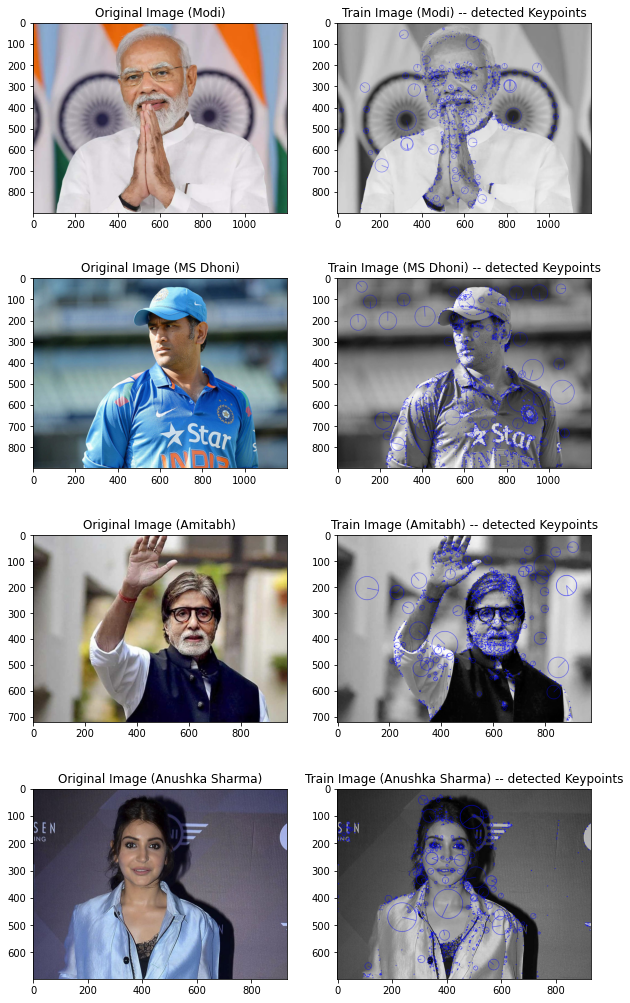

In [ ]:
# Threshold 
MIN_MATCH_COUNT=30

# Initiate SIFT detector
sift=cv2.xfeatures2d.SIFT_create()

# add different keypoints 
# imread(,this para to convert to grayscale ---- but why to convert to grayscale????)

fig = plt.figure(figsize=(10,18))

modi = cv2.imread("modi.jpg")
ax7 = fig.add_subplot(4,2,1)
ax7.imshow(cv2.cvtColor(modi, cv2.CV_32S)) 
plt.title('Original Image (Modi)')

train_img1=  to_grayscale(modi) # train image
kp1,desc1= sift.detectAndCompute(train_img1,None) # find the keypoints and descriptors with SIFT
train_img_kp1= cv2.drawKeypoints(train_img1,kp1,None,(0,0,255),4) # draw keypoints of the train image
ax1 = fig.add_subplot(4,2,2)
ax1.imshow(train_img_kp1)    # show the train image keypoints
plt.title('Train Image (Modi) -- detected Keypoints')
 
dhoni = cv2.imread("dhoni.jpeg")
ax5 = fig.add_subplot(4,2,3)
ax5.imshow(cv2.cvtColor(dhoni, cv2.CV_32S)) 
plt.title('Original Image (MS Dhoni)')

train_img2=  to_grayscale(dhoni) # train image
kp2,desc2= sift.detectAndCompute(train_img2,None) 
train_img_kp2= cv2.drawKeypoints(train_img2,kp2,None,(0,0,255),4) 
ax2 = fig.add_subplot(4,2,4)
ax2.imshow(train_img_kp2)    
plt.title('Train Image (MS Dhoni) -- detected Keypoints')

amitabh = cv2.imread("amitabh.jpeg")
ax6 = fig.add_subplot(4,2,5)
ax6.imshow(cv2.cvtColor(amitabh, cv2.CV_32S))
plt.title('Original Image (Amitabh)')

train_img3=  to_grayscale(amitabh)  # train image
kp3,desc3= sift.detectAndCompute(train_img3,None) # find the keypoints and descriptors with SIFT
train_img_kp3= cv2.drawKeypoints(train_img3,kp3,None,(0,0,255),4) # draw keypoints of the train image
ax3 = fig.add_subplot(4,2,6)
ax3.imshow(train_img_kp3)    # show the train image keypoints
plt.title('Train Image (Amitabh) -- detected Keypoints')

anushka = cv2.imread("anushka.jpg")
ax8 = fig.add_subplot(4,2,7)
ax8.imshow(cv2.cvtColor(anushka, cv2.CV_32S)) 
plt.title('Original Image (Anushka Sharma)')

train_img4=  to_grayscale(anushka) # train image
kp4,desc4= sift.detectAndCompute(train_img4,None) # find the keypoints and descriptors with SIFT
train_img_kp4= cv2.drawKeypoints(train_img4,kp4,None,(0,0,255),4) # draw keypoints of the train image
ax4 = fig.add_subplot(4,2,8)
ax4.imshow(train_img_kp4)    # show the train image keypoints
plt.title('Train Image (Anushka Sharma) -- detected Keypoints')

plt.savefig('SIFT1.png', bbox_inches='tight', pad_inches=0.5)

Text(0.5, 1.0, 'Query Image')

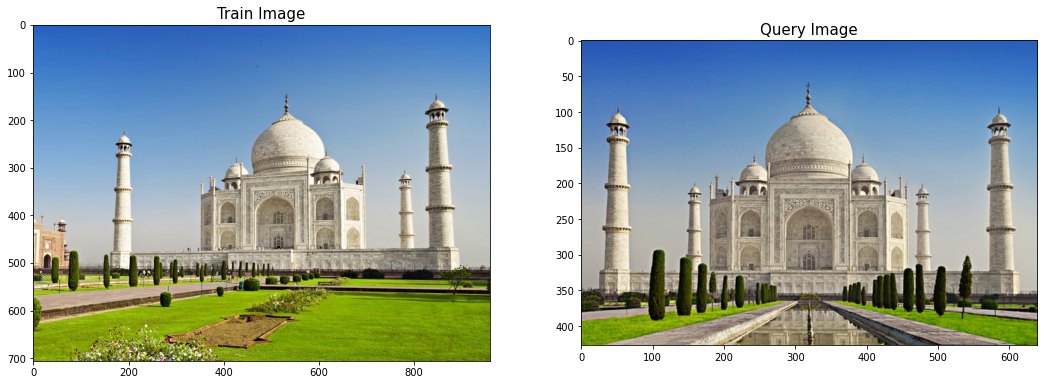

In [ ]:
train = cv2.imread('train.jpg')
query = cv2.imread('query.jpg')

fig = plt.figure(figsize=(18,10))

# Displaying input images 
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(train, cv2.CV_32S))
plt.title('Train Image', fontdict={'fontsize': 15})

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(query, cv2.CV_32S))
plt.title('Query Image', fontdict={'fontsize': 15})

Text(0.5, 1.0, 'Query Image into Grayscale version')

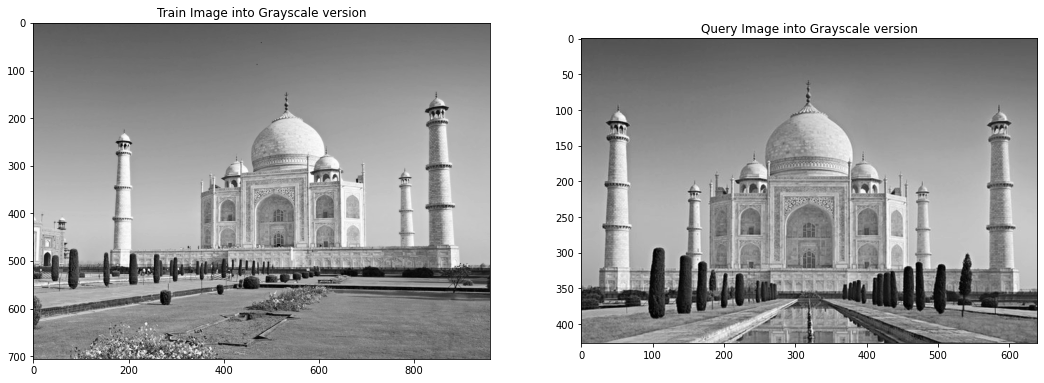

In [ ]:
# We are convertng the input images to grayscale version 
train_gray = to_grayscale(train)
query_gray = to_grayscale(query)

fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(train_gray, cmap='gray')
plt.title('Train Image into Grayscale version')

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(query_gray, cmap= 'gray')
plt.title('Query Image into Grayscale version')


Text(0.5, 1.0, 'Query Image into Grayscale version')

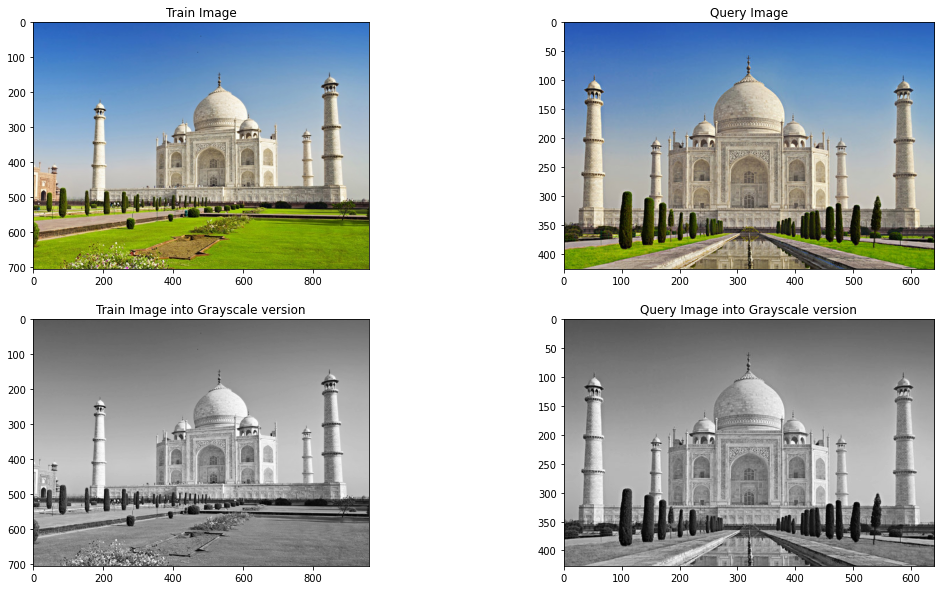

In [ ]:
fig = plt.figure(figsize=(18,10))

# Displaying input images 
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(cv2.cvtColor(train, cv2.CV_32S))
plt.title('Train Image')

ax2 = fig.add_subplot(2,2,2)
ax2.imshow(cv2.cvtColor(query, cv2.CV_32S))
plt.title('Query Image')

# Displaying grayscale images
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(train_gray, cmap='gray')
plt.title('Train Image into Grayscale version')

ax4 = fig.add_subplot(2,2,4)
ax4.imshow(query_gray, cmap= 'gray')
plt.title('Query Image into Grayscale version')

Text(0.5, 1.0, 'Query Image Keypoints')

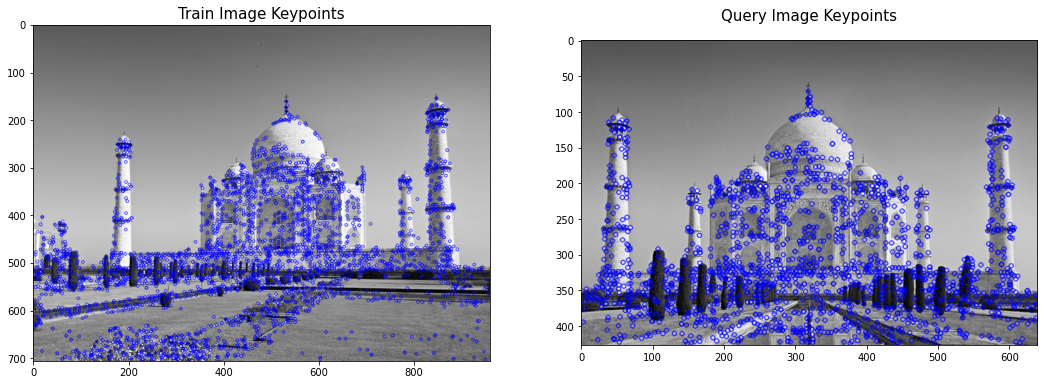

In [ ]:
# Initialising SIFT features detector 
sift = cv2.xfeatures2d.SIFT_create()
    
# Generating SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute(train_gray, None)
query_kp, query_desc = sift.detectAndCompute(query_gray, None)

fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow((cv2.drawKeypoints(train_gray, train_kp, train.copy(), (0,0,255))))
plt.title('Train Image Keypoints', fontdict={'fontsize': 15})

ax2 = fig.add_subplot(1,2,2)
ax2.imshow((cv2.drawKeypoints(query_gray, query_kp, query.copy(), (0,0,255))))
plt.title('Query Image Keypoints', fontdict={'fontsize': 15}, pad=20)

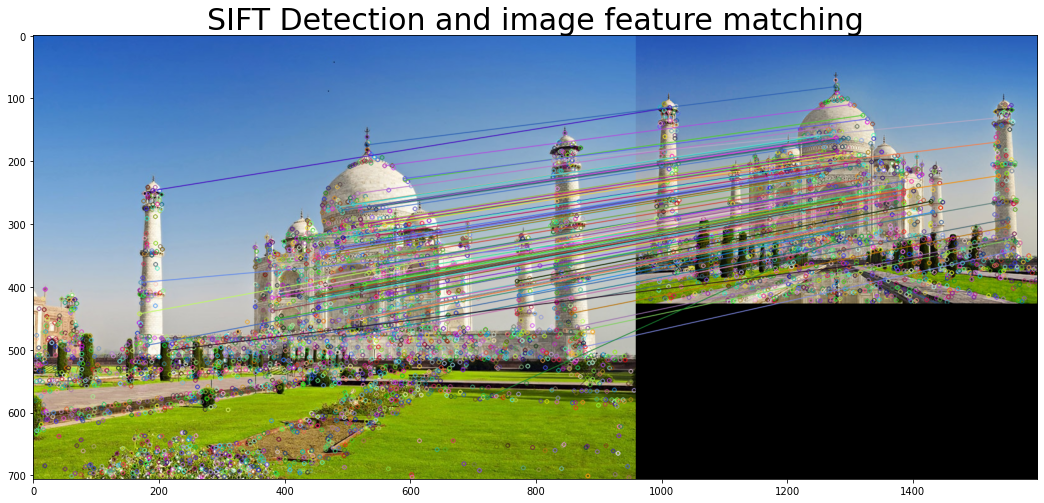

In [ ]:
# create a BFMatcher object which will match up the SIFT features of train and query images
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(train_desc, query_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    train, train_kp,
    query, query_kp,
    matches[:N_MATCHES], query.copy(), flags=0)

fig = plt.figure(figsize=(18,10))
plt.imshow(cv2.cvtColor(match_img, cv2.CV_32S))
plt.title('SIFT Detection and image feature matching', fontdict={'fontsize': 30})
plt.show()

Text(0.5, 1.0, 'Query Image')

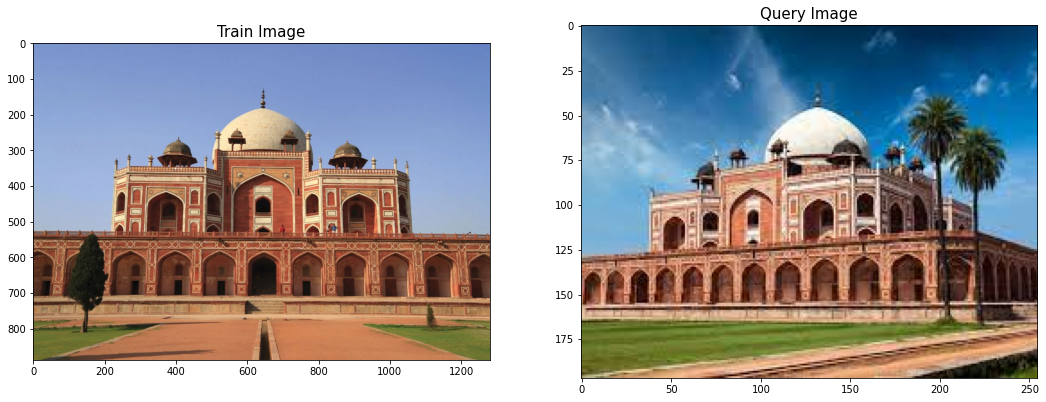

In [ ]:
train = cv2.imread('humayun1.jpg')
query = cv2.imread('humayun2.jpg')

fig = plt.figure(figsize=(18,10))

# Displaying input images 
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(cv2.cvtColor(train, cv2.CV_32S))
plt.title('Train Image', fontdict={'fontsize': 15})

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(cv2.cvtColor(query, cv2.CV_32S))
plt.title('Query Image', fontdict={'fontsize': 15})

Text(0.5, 1.0, 'Query Image into Grayscale version')

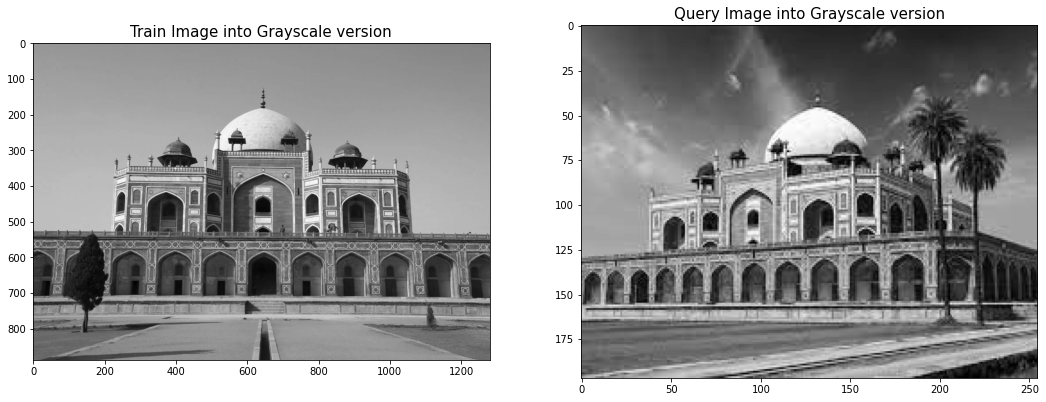

In [ ]:
# We are convertng the input images to grayscale version 
train_gray = to_grayscale(train)
query_gray = to_grayscale(query)

fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow(train_gray, cmap='gray')
plt.title('Train Image into Grayscale version', fontdict={'fontsize': 15})

ax2 = fig.add_subplot(1,2,2)
ax2.imshow(query_gray, cmap= 'gray')
plt.title('Query Image into Grayscale version', fontdict={'fontsize': 15})


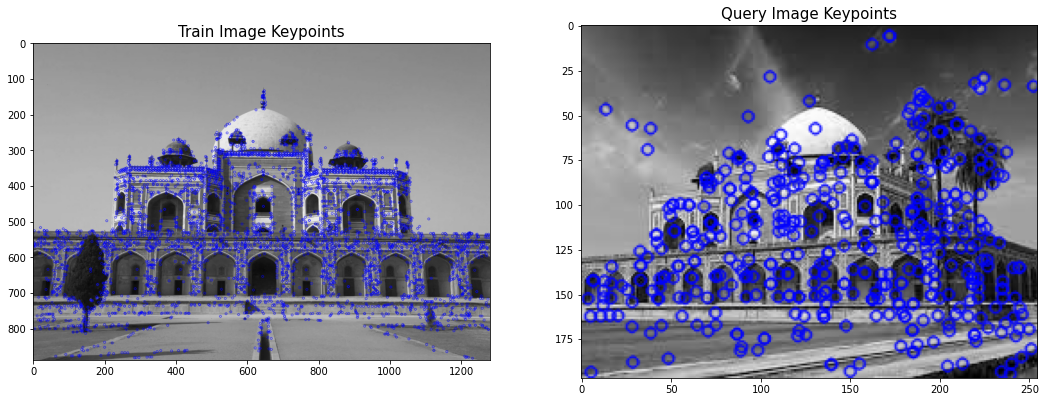

In [ ]:
# Generating SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute(train_gray, None)
query_kp, query_desc = sift.detectAndCompute(query_gray, None)

fig = plt.figure(figsize=(18,10))

ax1 = fig.add_subplot(1,2,1)
ax1.imshow((cv2.drawKeypoints(train_gray, train_kp, train.copy(), (0,0,255))))
plt.title('Train Image Keypoints', fontdict={'fontsize': 15})

ax2 = fig.add_subplot(1,2,2)
ax2.imshow((cv2.drawKeypoints(query_gray, query_kp, query.copy(), (0,0,255))))
plt.title('Query Image Keypoints', fontdict={'fontsize': 15})

plt.savefig('humayun_keypoints.png', bbox_inches='tight', pad_inches=0.5)

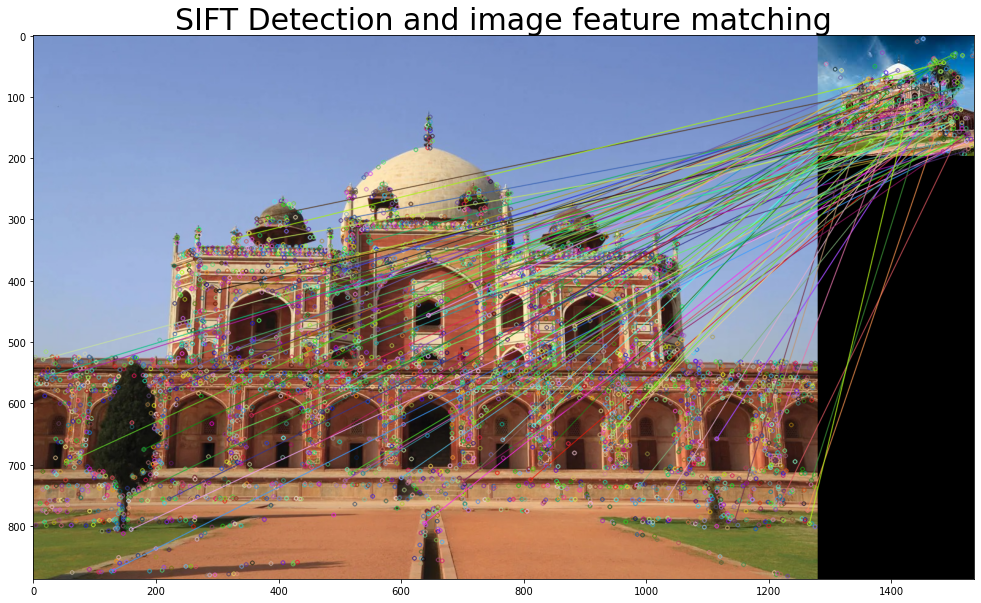

In [ ]:
# create a BFMatcher object which will match up the SIFT features of train and query images
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(train_desc, query_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    train, train_kp,
    query, query_kp,
    matches[:N_MATCHES], query.copy(), flags=0)

fig = plt.figure(figsize=(18,10))
plt.imshow(cv2.cvtColor(match_img, cv2.CV_32S))
plt.title('SIFT Detection and image feature matching', fontdict={'fontsize': 30})
plt.show()

**Submitted by Team :** </br>
Guneesh Vats - 2021122007 </br>
Abdul Hadi - </br>
Venkata Ramana - </br>
Priyansh Khunger - </br>
# New Section